# Векторный потенциал кольцевого тока

Вслед за

SCIENCE TIME.
ПОТЕНЦИАЛЫ – ИСТОЧНИКИ
ЭЛЕКТРИЧЕСКИХ, МАГНИТНЫХ И
ЭЛЕКТРОМАГНИТНЫХ ПОЛЕЙ.
Черкашин Юрий Семёнович

Выберем ортогональную цилиндрическую систему координат. Вектор тока в этой системе
имеет только одну альфовую проекцию. Такую же составляющую должен иметь
и вектор А

$d\vec{A} = \frac{\mu}{4 \pi}\int\limits_{\varphi}^{}\frac{d\vec{I}}{R}$

Элемент интегрирования

$d\vec{l} = r d \varphi \,{\vec {e}}_{\varphi }$

Его проекции на направления ${\vec {e}}_{r}$  и на ${\vec {e}}_{\varphi }$: 

$dl_r = r \, d \varphi \,sin\,{\varphi }$

$dl_{\varphi} = r \, d \varphi \,cos\,{\varphi }$

радиус-вектор интегрирования

$R=\sqrt{r_j^2+r_a^2-2\,r_j\,r_a\,cos(\varphi_j)+(z_j-z_a)^2}$

Выразим подкоренное выражение в относительных единицах - вынесем $r_j$ за знак радикала.

$R=r_j\sqrt{1+\frac{r_a^2}{r_j^2}-2\,\frac{r_a}{r_j}\,cos(\varphi_j)+\frac{(z_j-z_a)^2}{r_j^2}}$

$\vec{A} = \frac{\mu}{4 \pi}\int\limits_{\varphi}^{}\frac{I \, r_j \, d \varphi \,{\vec {e}}_{\varphi }}{R}$

$dl_{\varphi} = r_j \, d \varphi \,cos\,{\varphi }$

$A_{\varphi} = \frac{\mu}{4 \pi}\int\limits_{\varphi}^{}\frac{I \, r_j \,cos\,{\varphi } \, d \varphi}{R}$

$A_{\varphi} = \frac{\mu \, I}{4 \pi}\int\limits_{\varphi_j}^{}\frac{cos\,{\varphi_j } \, d \varphi_j}{\sqrt{1+\frac{r_a^2}{r_j^2}+\frac{(z_j-z_a)^2}{r_j^2}-2\,\frac{r_a}{r_j}\,cos(\varphi_j) }}$

$A_{\varphi} = \frac{\mu \, I}{4 \pi}\int\limits_{\varphi_j}^{}\frac{cos\,{\varphi_j } \, d \varphi_j}{\sqrt{a-b\,cos(\varphi_j) }}$,

где $a = 1+\frac{r_a^2}{r_j^2}+\frac{(z_j-z_a)^2}{r_j^2}$, $b = 2\,\frac{r_a}{r_j}$

преобразуем этот интеграл:
    
$A_{\varphi} = \frac{\mu \, I}{4 \pi}\int\limits_{\varphi_j}^{}\frac{cos\,{\varphi_j} \, d \varphi_j}{\sqrt{a-b\,cos(\varphi_j) }}$

$A_{\varphi} = -\frac{\mu \, I}{4 \pi b}\int\limits_{\varphi_j}^{}\frac{-\,b\,cos\,{\varphi_j} \, d \varphi_j}{\sqrt{a-b\,cos(\varphi_j) }}$

$A_{\varphi} = -\frac{\mu \, I}{4 \pi b}\int\limits_{\varphi_j}^{}\frac{a \,-\,b\,cos\,{\varphi_j} \,-\, a }{\sqrt{a-b\,cos(\varphi_j) }}\, d \varphi_j$

$A_{\varphi} = -\frac{\mu \, I}{4 \pi b}\int\limits_{\varphi_j}^{}\frac{a \,-\,b\,cos\,{\varphi_j} }{\sqrt{a-b\,cos(\varphi_j) }}\, d \varphi_j + \frac{\mu \, I}{4 \pi b}\int\limits_{\varphi}^{}\frac{a}{\sqrt{a-b\,cos(\varphi_j) }}\, d \varphi_j$

$A_{\varphi} = \frac{\mu \, I}{4 \pi b}\int\limits_{\varphi_j}^{}\frac{a}{\sqrt{a-b\,cos(\varphi_j) }}\, d \varphi_j -\frac{\mu \, I}{4 \pi b}\int\limits_{\varphi_j}^{}{\sqrt{a-b\,cos(\varphi_j) }}\, d \varphi_j $

Он свёлся к двум интегралам, напоминающим об эллиптической форме.

Далее воспользуемся тригонометрической формулой косинус двойного угла:

$cos 2 \alpha = cos^{~2} \alpha - sin^{~2} \alpha$

$cos(\varphi_j) = cos^{~2} \left(\frac{\varphi_j}{2}\right) - sin^{~2} \left(\frac{\varphi_j}{2}\right)$

$cos(\varphi_j) = 1 - 2\,sin^{~2} \left(\frac{\varphi_j}{2}\right)$

$A_{\varphi} = \frac{\mu \, I}{4 \pi b}\int\limits_{\varphi_j}^{}\frac{a}{\sqrt{a\,-\,b\,\left(1 - 2\,sin^{~2} \left(\frac{\varphi_j}{2}\right) \right) }}\, d \varphi_j -\frac{\mu \, I}{4 \pi b}\int\limits_{\varphi_j}^{}{\sqrt{a-b\,\left(1 - 2\,sin^{~2} \left(\frac{\varphi_j}{2}\right) \right) }}\, d \varphi_j $

$A_{\varphi} = \frac{\mu \, I}{4 \pi b}\int\limits_{\varphi_j}^{}\frac{a}{\sqrt{a\,-\,b\,+\,2\,b\,sin^{~2} \left(\frac{\varphi_j}{2}\right) }}\, d \varphi_j -\frac{\mu \, I}{4 \pi b}\int\limits_{\varphi_j}^{}{\sqrt{a-b + 2\,b\,sin^{~2} \left(\frac{\varphi_j}{2}\right) }}\, d \varphi_j $

Это эллиптические интегралы, однако, перед $sin^2x$ стоит знак плюс. Сделаем замену переменных:

$\frac{\varphi_j}{2} = \psi \pm \frac{\pi}{2}$

$\psi = \frac{\varphi_j}{2} \pm \frac{\pi}{2}$

$d\varphi_j = 2 \, d \psi$

$sin^{~2} \left(\frac{\varphi_j}{2}\right) = 1-cos^{~2} \left(\frac{\varphi_j}{2}\right) = 1-sin^{~2} \psi$

Пределы 

$\varphi_j = 0$, $\psi = \frac{\pi}{2}$

$\varphi_j = 2 \pi$, $\frac{\varphi_j}{2} = \pi$, $\psi = -\frac{\pi}{2}$

$\left\{cos \,\alpha = sin \left(\frac{\pi}{2} \pm \alpha \right)\right\}$

$A_{\varphi} = \frac{2\,\mu \, I}{4 \pi b}\int\limits_{\psi}^{}\frac{a}{\sqrt{a\,-\,b\,+\,2\,b\,\left(1-sin^{~2} \psi\right) }}\, d \psi -\frac{2\,\mu \, I}{4 \pi b}\int\limits_{\psi}^{}{\sqrt{a-b + 2\,b\,\left(1-sin^{~2} \psi\right) }}\, d \psi$

$A_{\varphi} = \frac{2\,\mu \, I}{4 \pi b}\int\limits_{\psi}^{}\frac{a}{\sqrt{a\,+\,b\,-\,2\,b\,sin^{~2} \psi }}\, d \psi -\frac{2\,\mu \, I}{4 \pi b}\int\limits_{\psi}^{}{\sqrt{a\,+\,b\,-\,2\,b\,sin^{~2} \psi }}\, d \psi$

вынесем из под корня $\left(a\,+\,b\right)$, 

$A_{\varphi} = \frac{2\,\mu \, I}{4 \pi b}\frac{1}{\sqrt{a+b}}\int\limits_{\psi}^{}\frac{a}{\sqrt{1\,-\,\frac{2\,b}{a+b}\,sin^{~2} \psi }}\, d \psi -\frac{2\,\mu \, I}{4 \pi b}\sqrt{a+b}\int\limits_{\psi}^{}{\sqrt{1\,-\,\frac{2\,b}{a+b}\,sin^{~2} \psi }}\, d \psi$

обозначив $m=\frac{2\,b}{a\,+\,b}$ получим: 

$A_{\varphi} = \frac{\mu \, I}{4 \pi} \left(\frac{a}{b}\frac{2}{\sqrt{a+b}}\int\limits_{\psi}^{}\frac{d \psi}{\sqrt{1\,-\,m\,sin^{~2} \psi }} - \frac{2\sqrt{a+b}}{b}\int\limits_{\psi}^{}{\sqrt{1\,-\,m\,sin^{~2} \psi }}\, d \psi \right)$

Имеем два стандартных эллиптических интеграла.

Окончательно имеем

$A_{\varphi} = \frac{\mu \, I}{4 \pi} \left(\frac{a}{b}\frac{2}{\sqrt{a+b}}\int\limits_{0}^{\pi/2}\frac{d \psi}{\sqrt{1\,-\,m\,sin^{~2} \psi }} - \frac{2\sqrt{a+b}}{b}\int\limits_{0}^{\pi/2}{\sqrt{1\,-\,m\,sin^{~2} \psi }}\, d \psi \right)$

$A_{\varphi} = \frac{\mu \, I}{4 \pi} \left(k_K\int\limits_{0}^{\pi/2}\frac{d \psi}{\sqrt{1\,-\,m\,sin^{~2} \psi }} - k_E\int\limits_{0}^{\pi/2}{\sqrt{1\,-\,m\,sin^{~2} \psi }}\, d \psi \right)$

$k_K = \frac{a}{b}\frac{2}{\sqrt{a+b}}$

$k_E = \frac{2\sqrt{a+b}}{b}$

$A_{\varphi} = \frac{\mu \, I}{4 \pi} \left(k_K\,K(m) - k_E\,E(m) \right)$

где при принятых обозначениях

$K = \int\limits_{0}^{\pi/2}\frac{d \psi}{\sqrt{1\,-\,k^2\,sin^{~2} \psi }}$

$E = \int\limits_{0}^{\pi/2}{\sqrt{1\,-\,k^2\,sin^{~2} \psi }}\, d \psi$

есть полные эллиптические интегралы первого и второго рода

Полный нормальный эллиптический интеграл Лежандра 1-го рода

Complete elliptic integral of the first kind

class sage.functions.special.EllipticKC

Return the complete elliptic integral of the first kind:

$K(m) = \int\limits_{0}^{\pi/2}\frac{d \psi}{\sqrt{1\,-\,m\,sin^{~2} \psi }}$

sage: elliptic_kc(m)     

Полный нормальный эллиптический интеграл Лежандра 2-го рода

Complete elliptic integral of the second kind

class sage.functions.special.EllipticEC

$E(m) = \int\limits_{0}^{\pi/2}{\sqrt{1\,-\,m\,sin^{~2} \psi }}\, d \psi$

sage: elliptic_ec(m)

In [267]:
from IPython.display import display, Math, Latex

def disp(ex):
    display(Math(latex(ex)))

In [140]:
z_j = var("z_j")
z_a = var("z_a")
r_j = var("r_j")
r_a = var("r_a")

assume(r_j>0)
assume(r_a>0)

$a = 1+\frac{r_a^2}{r_j^2}+\frac{(z_j-z_a)^2}{r_j^2}$, $b = 2\,\frac{r_a}{r_j}$

In [3]:
a = lambda rj, ra, zj, za : 1 + (ra/rj)^2 + ((zj-za)/rj)^2
b = lambda rj, ra : 2 * (ra/rj)

$m = \frac{2\,b}{a\,+\,b}$

In [4]:
m = lambda rj, ra, zj, za : 2 * b (rj, ra) / (a(rj, ra, zj, za) + b(rj, ra))

$k_K = \frac{a}{b}\frac{2}{\sqrt{a+b}}$

$k_E = \frac{2\sqrt{a+b}}{b}$

In [5]:
k_K = lambda rj, ra, zj, za : 2 * a(rj, ra, zj, za) / b(rj, ra) / sqrt(a(rj, ra, zj, za) + b(rj, ra))
k_E = lambda rj, ra, zj, za : 2 * sqrt(a(rj, ra, zj, za) + b(rj, ra)) / b(rj, ra)

$A_{\varphi} = \frac{\mu \, I}{4 \pi} \left(k_K\,K - k_E\,E \right)$

In [7]:
A_phi = lambda rj, ra, zj, za : \
      + k_K(rj, ra, zj, za) * elliptic_kc(m(rj, ra, zj, za)) \
      - k_E(rj, ra, zj, za) * elliptic_ec(m(rj, ra, zj, za))

Векторный потенциал токового кольца на высоте z=0,2r

In [65]:
plot_data_A_ring_r = []
for ir in range(1,200):
    # Расстояние от оси R/r (лин шкала)
    ra = 0.01 * ir
    A_phi_ring = A_phi(rj = 1, ra = ra, zj = 0, za = 0.2)
    plot_data_A_ring_r += [(ra, A_phi_ring)]

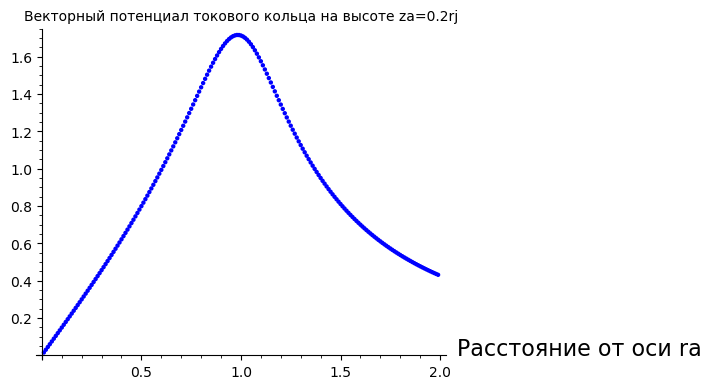

In [66]:
p = list_plot(plot_data_A_ring_r)
p.show(title="Векторный потенциал токового кольца на высоте za=0.2rj",
       axes_labels=["Расстояние от оси ra", ""])

Измерительный контур равного с кольцом диаметра приподнятый на z/r

In [67]:
plot_data_A_ring_z = []
for iz in range(1,100):
    za = 0.01 * iz
    A_phi_ring = A_phi(rj = 1, ra = 1, zj = 0, za = za)
    plot_data_A_ring_z += [(za, A_phi_ring)]

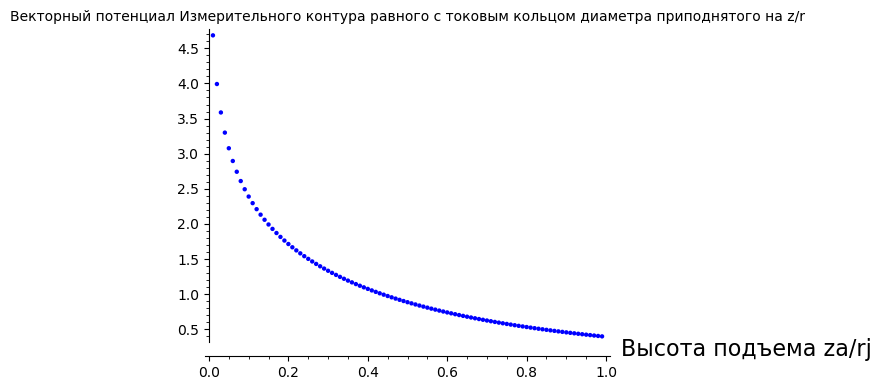

In [68]:
p = list_plot(plot_data_A_ring_z)
p.show(title="Векторный потенциал Измерительного контура равного с токовым кольцом диаметра приподнятого на z/r",
       axes_labels=["Высота подъема za/rj", ""])

# Векторный потенциал электростатического поля точечного заряда

$$\vec A = -\frac{ z}{{\rho}\sqrt{\rho^{2} + z^{2}} }\,{\vec {e}}_{\varphi }$$

In [119]:
A_q = lambda ra, za : za /(ra * sqrt(ra^2 + za^2))

In [128]:
plot_data_A_q_r = []
for ir in range(1,100):
    # Расстояние от оси R/r (лин шкала)
    ra = 0.1 * ir
    A_phi_q = A_q(ra = ra, za = 1)
    plot_data_A_q_r += [(ra, A_phi_q)]

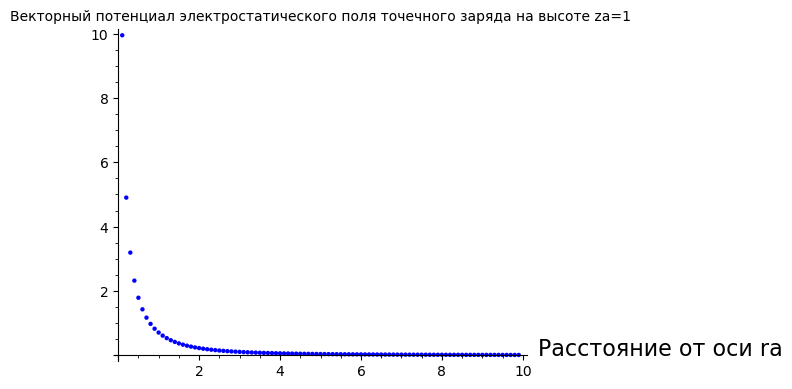

In [261]:
p = list_plot(plot_data_A_q_r)
p.show(title="Векторный потенциал электростатического поля точечного заряда на высоте za=1",
       axes_labels=["Расстояние от оси ra", ""])

Измерительный контур заданного диаметра приподнятый на высоту z

In [242]:
plot_data_A_q_z = []
for iz in range(1,100):
    za = 0.1 * iz
    A_phi_q = A_q(ra = 1, za = za)
    plot_data_A_q_z += [(za, A_phi_q)]

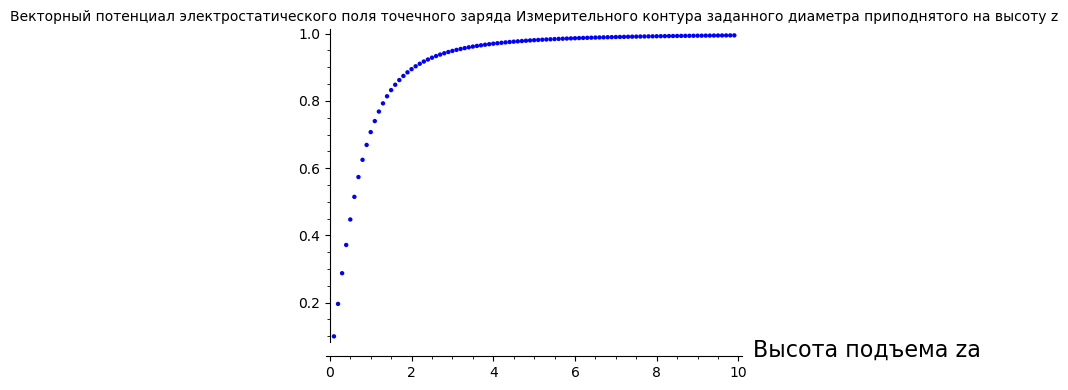

In [243]:
p = list_plot(plot_data_A_q_z)
p.show(title="Векторный потенциал электростатического поля точечного заряда Измерительного контура заданного диаметра приподнятого на высоту z",
       axes_labels=["Высота подъема za", ""])

# Векторный потенциал прецессирующего магнитного диполя

In [148]:
A_dipol = lambda rj, ra, zj, za : \
        + A_phi(rj, ra, +zj, za) \
        - A_phi(rj, ra, -zj, za)

Векторный потенциал прецессирующего магнитного диполя на высоте za в зависимости от Расстояние от оси ra

In [253]:
plot_data_A_dipol_r = []
for ir in range(1,200):
    # Расстояние от оси R/r (лин шкала)
    ra = 0.1 * ir
    d = .1
    A_phi_dipol = A_dipol(rj = 1*d, ra = ra, zj = d, za = 1)
    plot_data_A_dipol_r += [(ra, A_phi_dipol)]

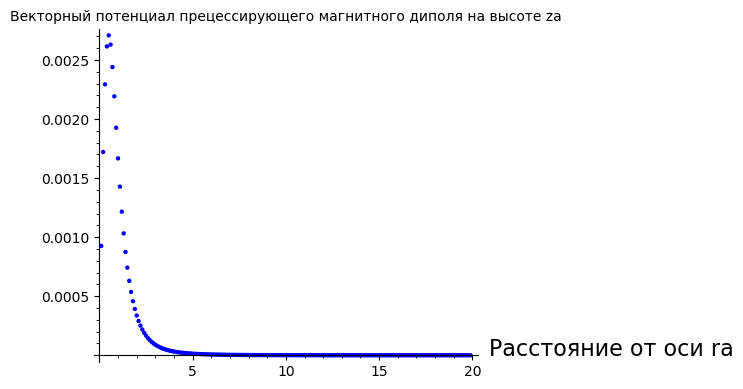

In [254]:
p = list_plot(plot_data_A_dipol_r)
p.show(title="Векторный потенциал прецессирующего магнитного диполя на высоте za",
       axes_labels=["Расстояние от оси ra", ""])

Измерительный контур равного с кольцом диаметра приподнятый на z/r

In [259]:
plot_data_A_dipol_z = []
for iz in range(1,100):
    za = 0.1 * iz
    d=1
    if (za != 1):
        A_phi_dipol = A_dipol(rj = 1*d, ra = 2, zj = 1*d, za = za)
        #print(za, A_phi_dipol)
        plot_data_A_dipol_z += [(za, A_phi_dipol)]

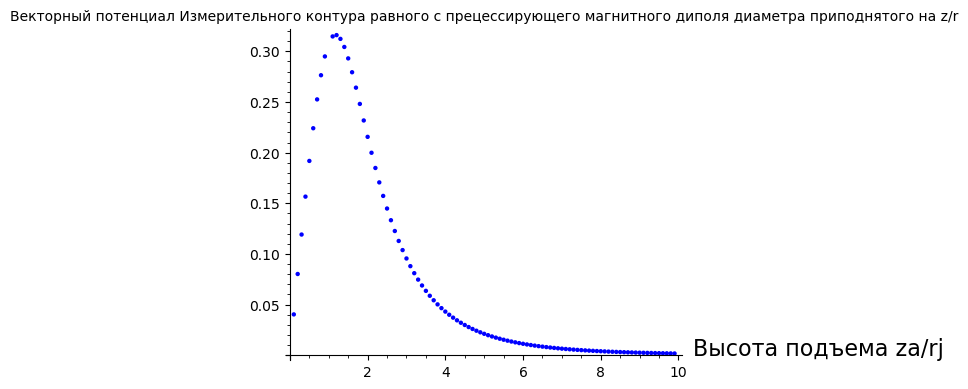

In [260]:
p = list_plot(plot_data_A_dipol_z)
p.show(title="Векторный потенциал Измерительного контура равного с прецессирующего магнитного диполя диаметра приподнятого на z/r",
       axes_labels=["Высота подъема za/rj", ""])

# Интегральное уравнение для векторного потенциала кулоновского заряда 

в цилиндрической системе координат

$r_a$, $z_a$ - координаты наблюдения

$r_m$, $z_m$, $\varphi_m$ - координаты интегрирования, координаты магнитных зарядов

$-\frac{z_a}{{r_a}\sqrt{r_a^{2} + z_a^{2}} } = \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{r_m=0}^{\infty}\frac{q_m(r_m, z_m)\, \omega_m (r_m, z_m)}{c} r_m \left(\int\limits_{\varphi_m=0}^{2\pi}\frac{cos\,{\varphi_m } \, d \varphi_m}{\sqrt{1+\frac{r_a^2}{r_m^2}+\frac{(z_m-z_a)^2}{r_m^2}-2\,\frac{r_a}{r_m}\,cos(\varphi_m) }}\right)d r_m \, d z_m$

Неизвестные функции

$q_m(r_m, z_m)$ - плотность магнитного заряда в зависимости от цилиндрических координат

$\omega_m (r_m, z_m)$ - круговая частота вращения

$-1 = \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{r_m=0}^{\infty}\frac{q_m(r_m, z_m)\, \omega_m (r_m, z_m)}{c} r_m \left(\int\limits_{\varphi_m=0}^{2\pi}\frac{1}{\frac{z_a}{{r_a}\sqrt{r_a^{2} + z_a^{2}}}}\frac{cos\,{\varphi_m} \, d \varphi_m}{\sqrt{1+\frac{r_a^2}{r_m^2}+\frac{(z_m-z_a)^2}{r_m^2}-2\,\frac{r_a}{r_m}\,cos(\varphi_m) }}\right)d r_m \, d z_m$

$-1 = \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{r_m=0}^{\infty}\frac{q_m(r_m, z_m)\, \omega_m (r_m, z_m)}{c} r_m \left(\int\limits_{\varphi_m=0}^{2\pi}\frac{1}{\sqrt{\frac{z_a^2}{r_a^2 \left(r_a^{2} + z_a^{2}\right)}}}\frac{cos\,{\varphi_m} \, d \varphi_m}{\sqrt{1+\frac{r_a^2}{r_m^2}+\frac{\left(z_m-z_a\right)^2}{r_m^2}-2\,\frac{r_a}{r_m}\,cos(\varphi_m) }}\right)d r_m \, d z_m$

$-1 = \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{r_m=0}^{\infty}\frac{q_m(r_m, z_m)\, \omega_m (r_m, z_m)}{c} r_m \left(\int\limits_{\varphi_m=0}^{2\pi}\frac{cos\,{\varphi_m} \, d \varphi_m}{\sqrt{\frac{z_a^2}{r_a^2 \left(r_a^{2} + z_a^{2}\right)}\left(1+\frac{r_a^2}{r_m^2}+\frac{(z_m-z_a)^2}{r_m^2}-2\,\frac{r_a}{r_m}\,cos(\varphi_m)\right) }}\right)d r_m \, d z_m$

$-1 = \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{r_m=0}^{\infty}\frac{q_m(r_m, z_m)\, \omega_m (r_m, z_m)}{c} r_m \left(\int\limits_{\varphi_m=0}^{2\pi}\frac{cos\,{\varphi_m} \, d \varphi_m}{\sqrt{\frac{z_a^2}{r_a^2 \left(r_a^{2} + z_a^{2}\right)}\left(1+\frac{r_a^2}{r_m^2}+\frac{(z_m-z_a)^2}{r_m^2}\right)-\left(2\,\frac{r_a}{r_m}\frac{z_a^2}{r_a^2 \left(r_a^{2} + z_a^{2}\right)}\right)\,cos(\varphi_m) }}\right)d r_m \, d z_m$

$-1 = \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{r_m=0}^{\infty}\frac{q_m(r_m, z_m)\, \omega_m (r_m, z_m)}{c} r_m \left(\int\limits_{\varphi_m=0}^{2\pi}\frac{cos\,{\varphi_m} \, d \varphi_m}{\sqrt{a-b\,cos(\varphi_m) }}\right)d r_m \, d z_m$

где теперь уже
$a = \frac{z_a^2}{r_a^2 \left(r_a^{2} + z_a^{2}\right)}\left(1+\frac{r_a^2}{r_m^2}+\frac{(z_m-z_a)^2}{r_m^2}\right)$

$b = \left(2\,\frac{r_a}{r_m}\frac{z_a^2}{r_a^2 \left(r_a^{2} + z_a^{2}\right)}\right)$

Произведя аналогичные преобразования к эллиптическим интегралам (аналогичные рассмотренным в перврй части данной работы) получим следующий вид интегрального уравнения

$-1 = \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{r_m=0}^{\infty}\frac{q_m(r_m, z_m)\, \omega_m (r_m, z_m)}{c} r_m \left(\frac{a}{b}\frac{2}{\sqrt{a+b}}\int\limits_{0}^{\pi/2}\frac{d \psi}{\sqrt{1\,-\,m\,sin^{~2} \psi }} - \frac{2\sqrt{a+b}}{b}\int\limits_{0}^{\pi/2}{\sqrt{1\,-\,m\,sin^{~2} \psi }}\, d \psi\right)d r_m \, d z_m$

принимая тот же вид для

$m=\frac{2\,b}{a\,+\,b}$

$k_K = \frac{a}{b}\frac{2}{\sqrt{a+b}}$

$k_E = \frac{2\sqrt{a+b}}{b}$

Перепишем теперь

$-1 = \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{r_m=0}^{\infty}\frac{q_m(r_m, z_m)\, \omega_m (r_m, z_m)}{c} r_m \left(k_K\,K(m) - k_E\,E(m)\right)d r_m \, d z_m$

In [262]:
z_m = var("z_m")
z_a = var("z_a")
r_m = var("r_m")
r_a = var("r_a")

assume(r_m>0)
assume(r_a>0)

$a = \frac{z_a^2}{r_a^2 \left(r_a^{2} + z_a^{2}\right)}\left(1+\frac{r_a^2}{r_m^2}+\frac{(z_m-z_a)^2}{r_m^2}\right)$

$b = \left(2\,\frac{r_a}{r_m}\frac{z_a^2}{r_a^2 \left(r_a^{2} + z_a^{2}\right)}\right)$

In [269]:
am = lambda rm, ra, zm, za : (1 + (ra/rm)^2 + ((zm-za)/rm)^2) * za^2/(ra^2*(ra^2 + za^2))
bm = lambda rm, ra, zm, za : 2 * (ra/rm) * za^2/(ra^2*(ra^2 + za^2))

In [270]:
disp(am(r_m, r_a, z_m, z_a))

<IPython.core.display.Math object>

In [271]:
disp(bm(r_m, r_a, z_m, z_a))

<IPython.core.display.Math object>

$m = \frac{2\,b}{a\,+\,b}$

In [275]:
mm = lambda rm, ra, zm, za : 2 * bm (rm, ra, zm, za) / (am(rm, ra, zm, za) + bm(rm, ra, zm, za))

In [276]:
disp(mm(r_m, r_a, z_m, z_a))

<IPython.core.display.Math object>

$k_K = \frac{a}{b}\frac{2}{\sqrt{a+b}}$

$k_E = \frac{2\sqrt{a+b}}{b}$

In [281]:
km_K = lambda rm, ra, zm, za : 2 * am(rm, ra, zm, za) / bm(rm, ra, zm, za) / sqrt(am(rm, ra, zm, za) + bm(rm, ra, zm, za))
km_E = lambda rm, ra, zm, za : 2 * sqrt(am(rm, ra, zm, za) + bm(rm, ra, zm, za)) / bm(rm, ra, zm, za)

In [282]:
disp(km_K(r_m, r_a, z_m, z_a))

<IPython.core.display.Math object>

In [283]:
disp(km_E(r_m, r_a, z_m, z_a))

<IPython.core.display.Math object>

ядро интегрального уравнения (в круглых скобках)

In [284]:
Jm_phi = lambda rm, ra, zm, za : \
      + k_K(rm, ra, zm, za) * elliptic_kc(m(rm, ra, zm, za)) \
      - k_E(rm, ra, zm, za) * elliptic_ec(m(rm, ra, zm, za))

In [287]:
disp(Jm_phi(r_m, r_a, z_m, z_a))

<IPython.core.display.Math object>

ядро интегрального уравнения (с учётом также и множителя $r_m$)

In [290]:
Kerm = lambda rm, ra, zm, za : rm * Jm_phi(rm, ra, zm, za)

In [291]:
disp(Kerm(r_m, r_a, z_m, z_a))

<IPython.core.display.Math object>

ядро интегрального уравнения (с учётом также и множителя $r_m$) - в дипольной форме (учитывая симметричность распределения магнитных зарядов относительно плоскости $z = 0$)

$-1 = \int\limits_{z_m=0}^{\infty}\,\,\int\limits_{r_m=0}^{\infty}\frac{q_m(r_m, z_m)\, \omega_m (r_m, z_m)}{c} Kerm\_dipol(r_m, r_a, z_m, z_a) \,\, d r_m \, d z_m$

In [294]:
Kerm_dipol = lambda rm, ra, zm, za : \
           + Kerm(rm, ra, +zm, za) \
           - Kerm(rm, ra, -zm, za)

In [295]:
disp(Kerm_dipol(r_m, r_a, z_m, z_a))

<IPython.core.display.Math object>

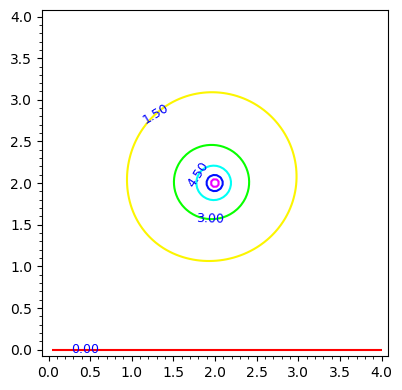

In [310]:
contour_plot(Kerm_dipol(rm = 2, ra=r_a, zm = 2, za=z_a), (r_a,0,4), (z_a,0,4), fill=False, cmap='hsv', labels=True)

In [303]:
Kern_dipol = lambda rm, ra, zm, za : \
           + Jm_phi(rm, ra, +zm, za) \
           - Jm_phi(rm, ra, -zm, za)

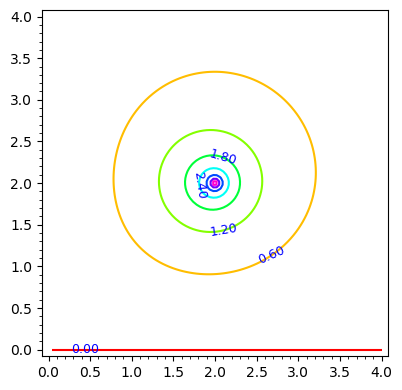

In [309]:
contour_plot(Kern_dipol(rm = 2, ra=r_a, zm = 2, za=z_a), (r_a,0,4), (z_a,0,4), fill=False, cmap='hsv', labels=True)

нам потребуются интегралы по координатному углу $\varphi$ точек истока от нуля до $2\pi$ и $\int\limits_{0}^{2\pi}{\frac{cos\left(\varphi\right)}{R}}d{\varphi} = 0$

$\int\limits_{0}^{2\pi}{\frac{sin\left(\varphi\right)}{R}}d{\varphi} = 0$

$R=\sqrt{(r_j\,sin(\varphi_j)-r_a\,sin(\varphi_a))^2+(r_j\,cos(\varphi_j)-r_a\,cos(\varphi_a))^2+(z_j-z_a)^2}$

Ввиду цилиндрической симметрии и ввиду того что

$\frac{\partial A}{\partial \varphi_a} = 0$

нам не потребуется дифференцирование векторного потенциала по $\varphi_a$ координате точек наблюдения, можно упростить расчёт полагая, что $\varphi_a = 0$, тогда 

$R=\sqrt{r_j^2+r_a^2-2\,r_j\,r_a\,cos(\varphi_j)+(z_j-z_a)^2}$

In [1]:
phi_j = var("phi_j")
Rja2       = lambda rj, ra, zj, za, phi_j : rj^2 + ra^2 - 2*rj*ra*cos(phi_j) + (zj-za)^2
one_per_R  = lambda rj, ra, zj, za, phi_j : 1 / sqrt(Rja2(rj, ra, zj, za, phi_j))
a_phi      = lambda rj, ra, zj, za, phi_j : cos(phi_j) * one_per_R(rj, ra, zj, za, phi_j)

In [ ]:
phi = var("phi")

In [2]:
a_phi_dipol = lambda rj, ra, zj, za, phi_j : a_phi(rj, ra, zj, za, phi_j) - a_phi(rj, ra, -zj, za, phi_j)


In [142]:
disp(Rja2(r_j, r_a, z_j, z_a, phi_j))

<IPython.core.display.Math object>

In [143]:
disp(a_phi(r_j, r_a, z_j, z_a, phi_j))

<IPython.core.display.Math object>

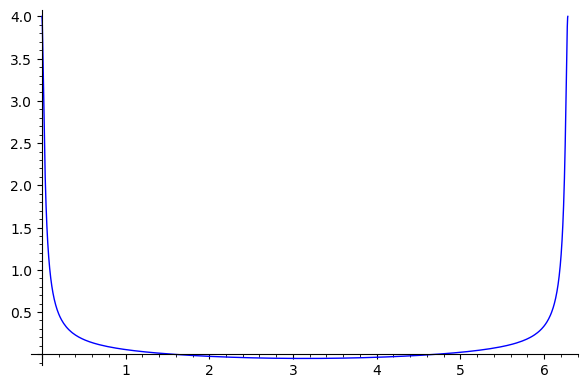

In [150]:
plot(a_phi(rj = 10, ra = 10.25, zj = 0, za = 0, phi_j = phi_j), phi_j, 0, 2*pi)

In [146]:
def get_integrand_view(f):
    return f(x)

class my_dummy_integral:
    f = None
    a = None
    b = None
    def __init__(self, f, a, b):
        print ("my_dummy_integral ", f, a, b)
        self.f = f
        self.a = a
        self.b = b

def num_int(f, a, b):
    from scipy import integrate

    to_call_integration = True

    if type(f) is my_dummy_integral:
        to_call_integration = False

    import inspect
    stack = inspect.stack()
    for frame in stack:
        func_name = frame[3]
        # print ("func_name = ", func_name)
        if ('get_integrand_view' == func_name):
            to_call_integration = False
            break;

    if not to_call_integration:
        return my_dummy_integral(f,a,b)

    try:
        integral = integrate.quad(f, a, b)

        result = integral[0]
        return result

    except Exception as ex:

        print ("Exception ex = ", str(ex))
        print ("f = ", f)
        try:
            print ("integrand = ", get_integrand_view(f))
        except Exception as ex2:
            print ("Exception ex2 = ", ex2)
        print ("a = ", a)
        print ("b = ", b)

        raise ex

        integral = numerical_integral(f, a, b)

        print ("integral = ", integral)

        result = integral[0]
        print ("result = ", result)
        return result


In [16]:
x, y, z = var("x,y,z")

In [18]:
A_E = \
(y*z/(sqrt(x^2 + y^2 + z^2)*(x^2 + y^2)),
 -x*z/(sqrt(x^2 + y^2 + z^2)*(x^2 + y^2)),
 0)

In [127]:
for AEi in A_E:
    disp(AEi.subs(x == r_a*cos(phi), y == r_a*sin(phi)).full_simplify())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

TypeError: subs() takes at most 1 positional argument (2 given)

In [128]:
A_y = -x*z/(sqrt(x^2 + y^2 + z^2)*(x^2 + y^2))

In [44]:
A_y0 = A_y.subs(y == 0)
A_y0

-z/(sqrt(x^2 + z^2)*x)

In [10]:
num_int( lambda phi_j : a_phi(rj = 10, ra = 10.5, zj = 1, za = 1.1, phi_j = phi_j), 0, 2*pi)

0.6015764178209648

In [11]:
num_int( lambda phi_j : a_phi(rj = 10, ra = 10.5, zj = -1, za = 1.1, phi_j = phi_j), 0, 2*pi)

0.3248439223023958

In [12]:
num_int( lambda phi_j : a_phi_dipol(rj = 10, ra = 10.5, zj = 1, za = 1.1, phi_j = phi_j), 0, 2*pi)

0.27673249551856066

In [19]:
A_dipol = lambda rj, ra, zj, za : num_int( lambda phi_j : a_phi_dipol(rj = rj, ra = ra, zj = zj, za = za, phi_j = phi_j), 0, 2*pi)

In [21]:
A_dipol(rj = 1, ra = 1, zj = 1, za = 1.1)

4.576202476449963

In [97]:
plot_data_A_phi_dipol_r = []
for ir in range(100):
    ra = 0.1 * ir
    A_phi_dipol = A_dipol(rj = 0.0001, ra = ra, zj = 0.0001, za = 1)
    plot_data_A_phi_dipol_r += [(ra, A_phi_dipol)]

-3.00000000000000e-8
-4.00000000000000e-8


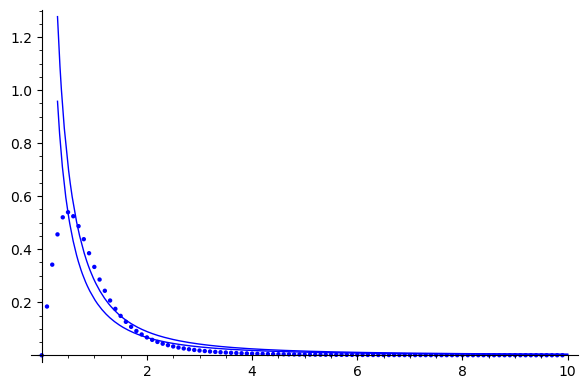

In [98]:
p = list_plot(plot_data_A_phi_dipol_r)
for ik in range(2):
    k = -0.00000001*(ik+3)
    print(k)
    p += plot(k*A_y0.subs(z == 1), x, 0.3, 10)
p.show()

In [132]:
plot_data_A_phi_dipol_z = []
for iz in range(100):
    za = 1 + 0.1 * iz
    A_phi_dipol = A_dipol(rj = 0.0001, ra = 1, zj = 0.0001, za = za)
    plot_data_A_phi_dipol_z += [(za, A_phi_dipol)]

In [133]:
A_y0.subs(x == 4)

-1/4*z/sqrt(z^2 + 16)

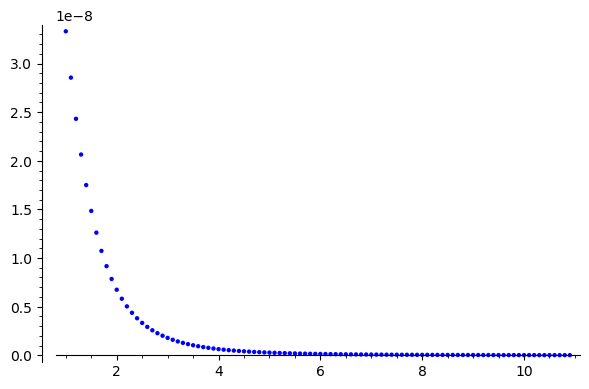

In [134]:
list_plot(plot_data_A_phi_dipol_z)

-3.00000000000000e-9
-4.00000000000000e-9


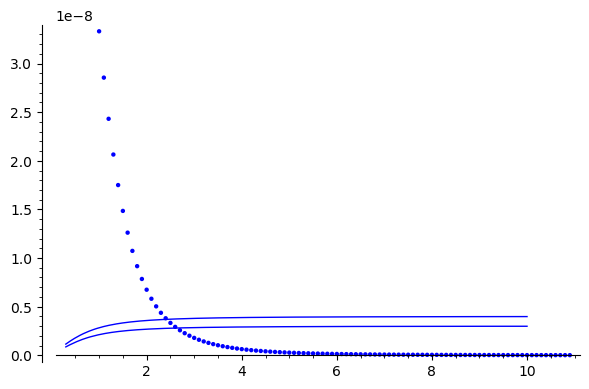

In [137]:
p = list_plot(plot_data_A_phi_dipol_z)
for ik in range(2):
    k = -0.000000001*(ik+3)
    print(k)
    p += plot(k*A_y0.subs(x == 1), z, 0.3, 10)
p.show()